## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
DRP_RATE = [0.25, 0.5, 0.75]

# hidden_Layer=3層

In [6]:
"""Code Here
建立你的神經網路
"""
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[128, 64, 32], drop_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)  
        else:
            x = keras.layers.Dense(units=unit,
                                 activation="relu",
                                 name="hidden_layer"+str(i+1))(x)
            x = Dropout(drop_ratio)(x)

    output_layer = keras.layers.Dense(units=output_units,
                            activation="softmax",
                            name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], 
                               outputs=[output_layer])
    return model

In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp in DRP_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with DRP_RATE = %.2f" %(drp))
    model = build_mlp(input_shape=x_train.shape[1:], drop_ratio=drp)
    model.summary()
    opt = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-drop_ratio-%s" %str(drp)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with DRP_RATE = 0.25
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 128)               393344    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                2080      
_________________________________________________________________
dropout_3 (Dropout)        

50000/50000 [==============================] - 5s 109us/step - loss: 1.7597 - accuracy: 0.3606 - val_loss: 1.6682 - val_accuracy: 0.4044
Epoch 47/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7577 - accuracy: 0.3624 - val_loss: 1.6808 - val_accuracy: 0.3982
Epoch 48/50
50000/50000 [==============================] - 6s 117us/step - loss: 1.7505 - accuracy: 0.3637 - val_loss: 1.6697 - val_accuracy: 0.4034
Epoch 49/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.7539 - accuracy: 0.3641 - val_loss: 1.6918 - val_accuracy: 0.3925
Epoch 50/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.7605 - accuracy: 0.3600 - val_loss: 1.6856 - val_accuracy: 0.4023
Experiment with DRP_RATE = 0.50
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_____________________

50000/50000 [==============================] - 4s 90us/step - loss: 2.2187 - accuracy: 0.1395 - val_loss: 2.2006 - val_accuracy: 0.1511
Epoch 42/50
50000/50000 [==============================] - 5s 90us/step - loss: 2.2163 - accuracy: 0.1387 - val_loss: 2.1527 - val_accuracy: 0.1739
Epoch 43/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2161 - accuracy: 0.1413 - val_loss: 2.1570 - val_accuracy: 0.1709
Epoch 44/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.2165 - accuracy: 0.1404 - val_loss: 2.1837 - val_accuracy: 0.1593
Epoch 45/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2173 - accuracy: 0.1383 - val_loss: 2.1861 - val_accuracy: 0.1554
Epoch 46/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2162 - accuracy: 0.1409 - val_loss: 2.1729 - val_accuracy: 0.1568
Epoch 47/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.2163 - accuracy: 0.1414 - val_loss: 2.1987

50000/50000 [==============================] - 5s 101us/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 5s 97us/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 35/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 36/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 37/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 38/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3026 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 39/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.302

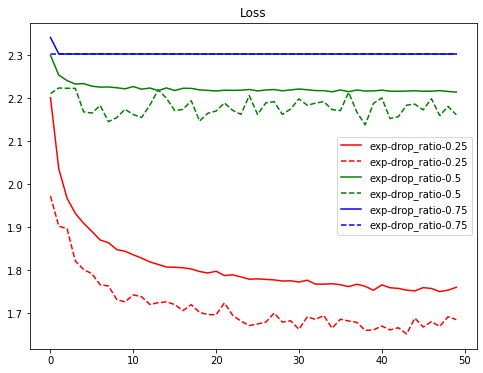

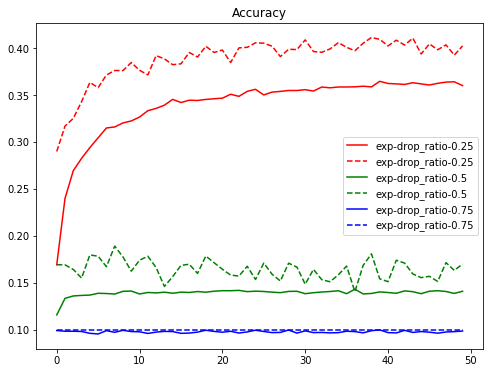

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# hidden_Layer=4層

In [9]:
"""Code Here
建立你的神經網路
"""
from keras.layers import Dropout

def build_mlp(input_shape, output_units=10, num_neurons=[256, 128, 64, 32], drop_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, unit in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=unit, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drop_ratio)(x)  
        else:
            x = keras.layers.Dense(units=unit,
                                 activation="relu",
                                 name="hidden_layer"+str(i+1))(x)
            x = Dropout(drop_ratio)(x)

    output_layer = keras.layers.Dense(units=output_units,
                            activation="softmax",
                            name="output_layer")(x)
    model = keras.models.Model(inputs=[input_layer], 
                               outputs=[output_layer])
    return model

In [10]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drp in DRP_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with DRP_RATE = %.2f" %(drp))
    model = build_mlp(input_shape=x_train.shape[1:], drop_ratio=drp)
    model.summary()
    opt = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt)
    
    model.fit(x_train, y_train,
             epochs=EPOCHS,
             batch_size=BATCH_SIZE,
             validation_data=(x_test, y_test),
             shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name = "exp-drop_ratio-%s" %str(drp)
    results[exp_name] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with DRP_RATE = 0.25
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 256)               786688    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 64)                8256      
_________________________________________________________________
dropout_3 (Dropout)        

50000/50000 [==============================] - 7s 144us/step - loss: 1.7205 - accuracy: 0.3825 - val_loss: 1.6586 - val_accuracy: 0.4099
Epoch 45/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7229 - accuracy: 0.3820 - val_loss: 1.6610 - val_accuracy: 0.4133
Epoch 46/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7190 - accuracy: 0.3812 - val_loss: 1.6330 - val_accuracy: 0.4248
Epoch 47/50
50000/50000 [==============================] - 7s 145us/step - loss: 1.7148 - accuracy: 0.3852 - val_loss: 1.6460 - val_accuracy: 0.4228
Epoch 48/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7147 - accuracy: 0.3858 - val_loss: 1.6419 - val_accuracy: 0.4177
Epoch 49/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.7130 - accuracy: 0.3836 - val_loss: 1.6350 - val_accuracy: 0.4218
Epoch 50/50
50000/50000 [==============================] - 7s 148us/step - loss: 1.7166 - accuracy: 0.3844 - val_loss:

50000/50000 [==============================] - 7s 145us/step - loss: 2.1427 - accuracy: 0.1741 - val_loss: 2.1327 - val_accuracy: 0.1811
Epoch 38/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.1428 - accuracy: 0.1749 - val_loss: 2.1656 - val_accuracy: 0.1642
Epoch 39/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.1436 - accuracy: 0.1744 - val_loss: 2.1565 - val_accuracy: 0.1514
Epoch 40/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.1415 - accuracy: 0.1754 - val_loss: 2.1563 - val_accuracy: 0.1765
Epoch 41/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.1429 - accuracy: 0.1742 - val_loss: 2.1582 - val_accuracy: 0.1524
Epoch 42/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.1400 - accuracy: 0.1753 - val_loss: 2.1443 - val_accuracy: 0.1786
Epoch 43/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.1442 - accuracy: 0.1739 - val_loss:

50000/50000 [==============================] - 7s 144us/step - loss: 2.3027 - accuracy: 0.0969 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 29/50
50000/50000 [==============================] - 7s 144us/step - loss: 2.3027 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 30/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 31/50
50000/50000 [==============================] - 7s 145us/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 32/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.3027 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 33/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.3027 - accuracy: 0.0981 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 34/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss:

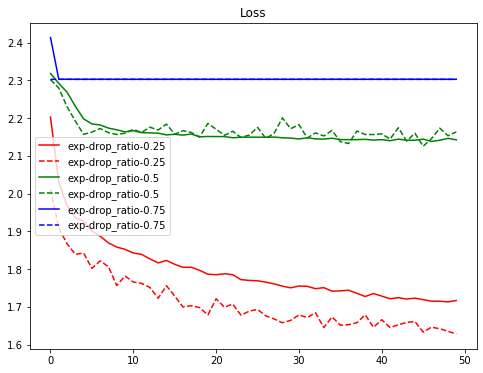

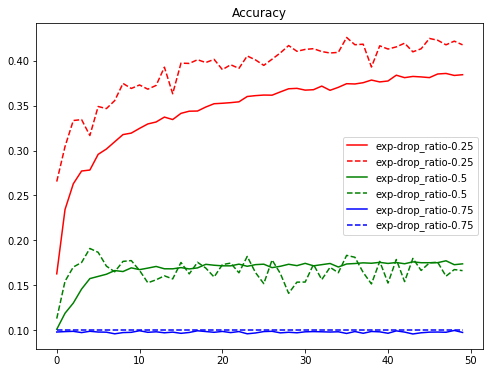

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()